Edoardo Merli edoardo.merli@studio.unibo.it

1. Load the data file and explore the data, showing size, data descriptions,
data distributions with boxplot, pairplots 

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

random_state = 42

In [17]:
filename = 'ML-Python-Lab-Data.csv'
df = pd.read_csv(filename, names=['Index','Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [18]:
df.head()

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [19]:
np.unique(df['Sex'])

array(['F', 'I', 'M'], dtype=object)

Will OneHotEncode column 'Sex' since it's of nominal data type

In [20]:
encoded_sex = pd.get_dummies(df[['Sex']])
df = df.join(encoded_sex)
df = df.drop('Sex', axis=1)

In [21]:
df.head()

,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0,0,0,1
1,1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0,0,0,1
2,2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0,1,0,0
3,3,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0,0,0,1
4,4,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0,0,1,0


In [44]:
print(f"The shape of the dataframe is {df.shape}")
df.describe()

The shape of the dataframe is (4177, 10)


,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,2088.000000,1.008379,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,1205.940366,0.796410,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1044.000000,0.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,2088.000000,1.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,3132.000000,2.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,4176.000000,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


From the "count" row we can see that there are some missing value in each attribute except for "Sex" and "Rings"

In [45]:
print(f"The number of rows with missing values (NaNs) is: {len(df) - len(df.dropna())}")

The number of rows with missing values (NaNs) is: 1125


In [46]:
# Dropping the rows with missing values (nan)
df = df.dropna()
print(f"The shape of the dataframe after dropping missing values is {df.shape}")

The shape of the dataframe after dropping missing values is (3052, 10)


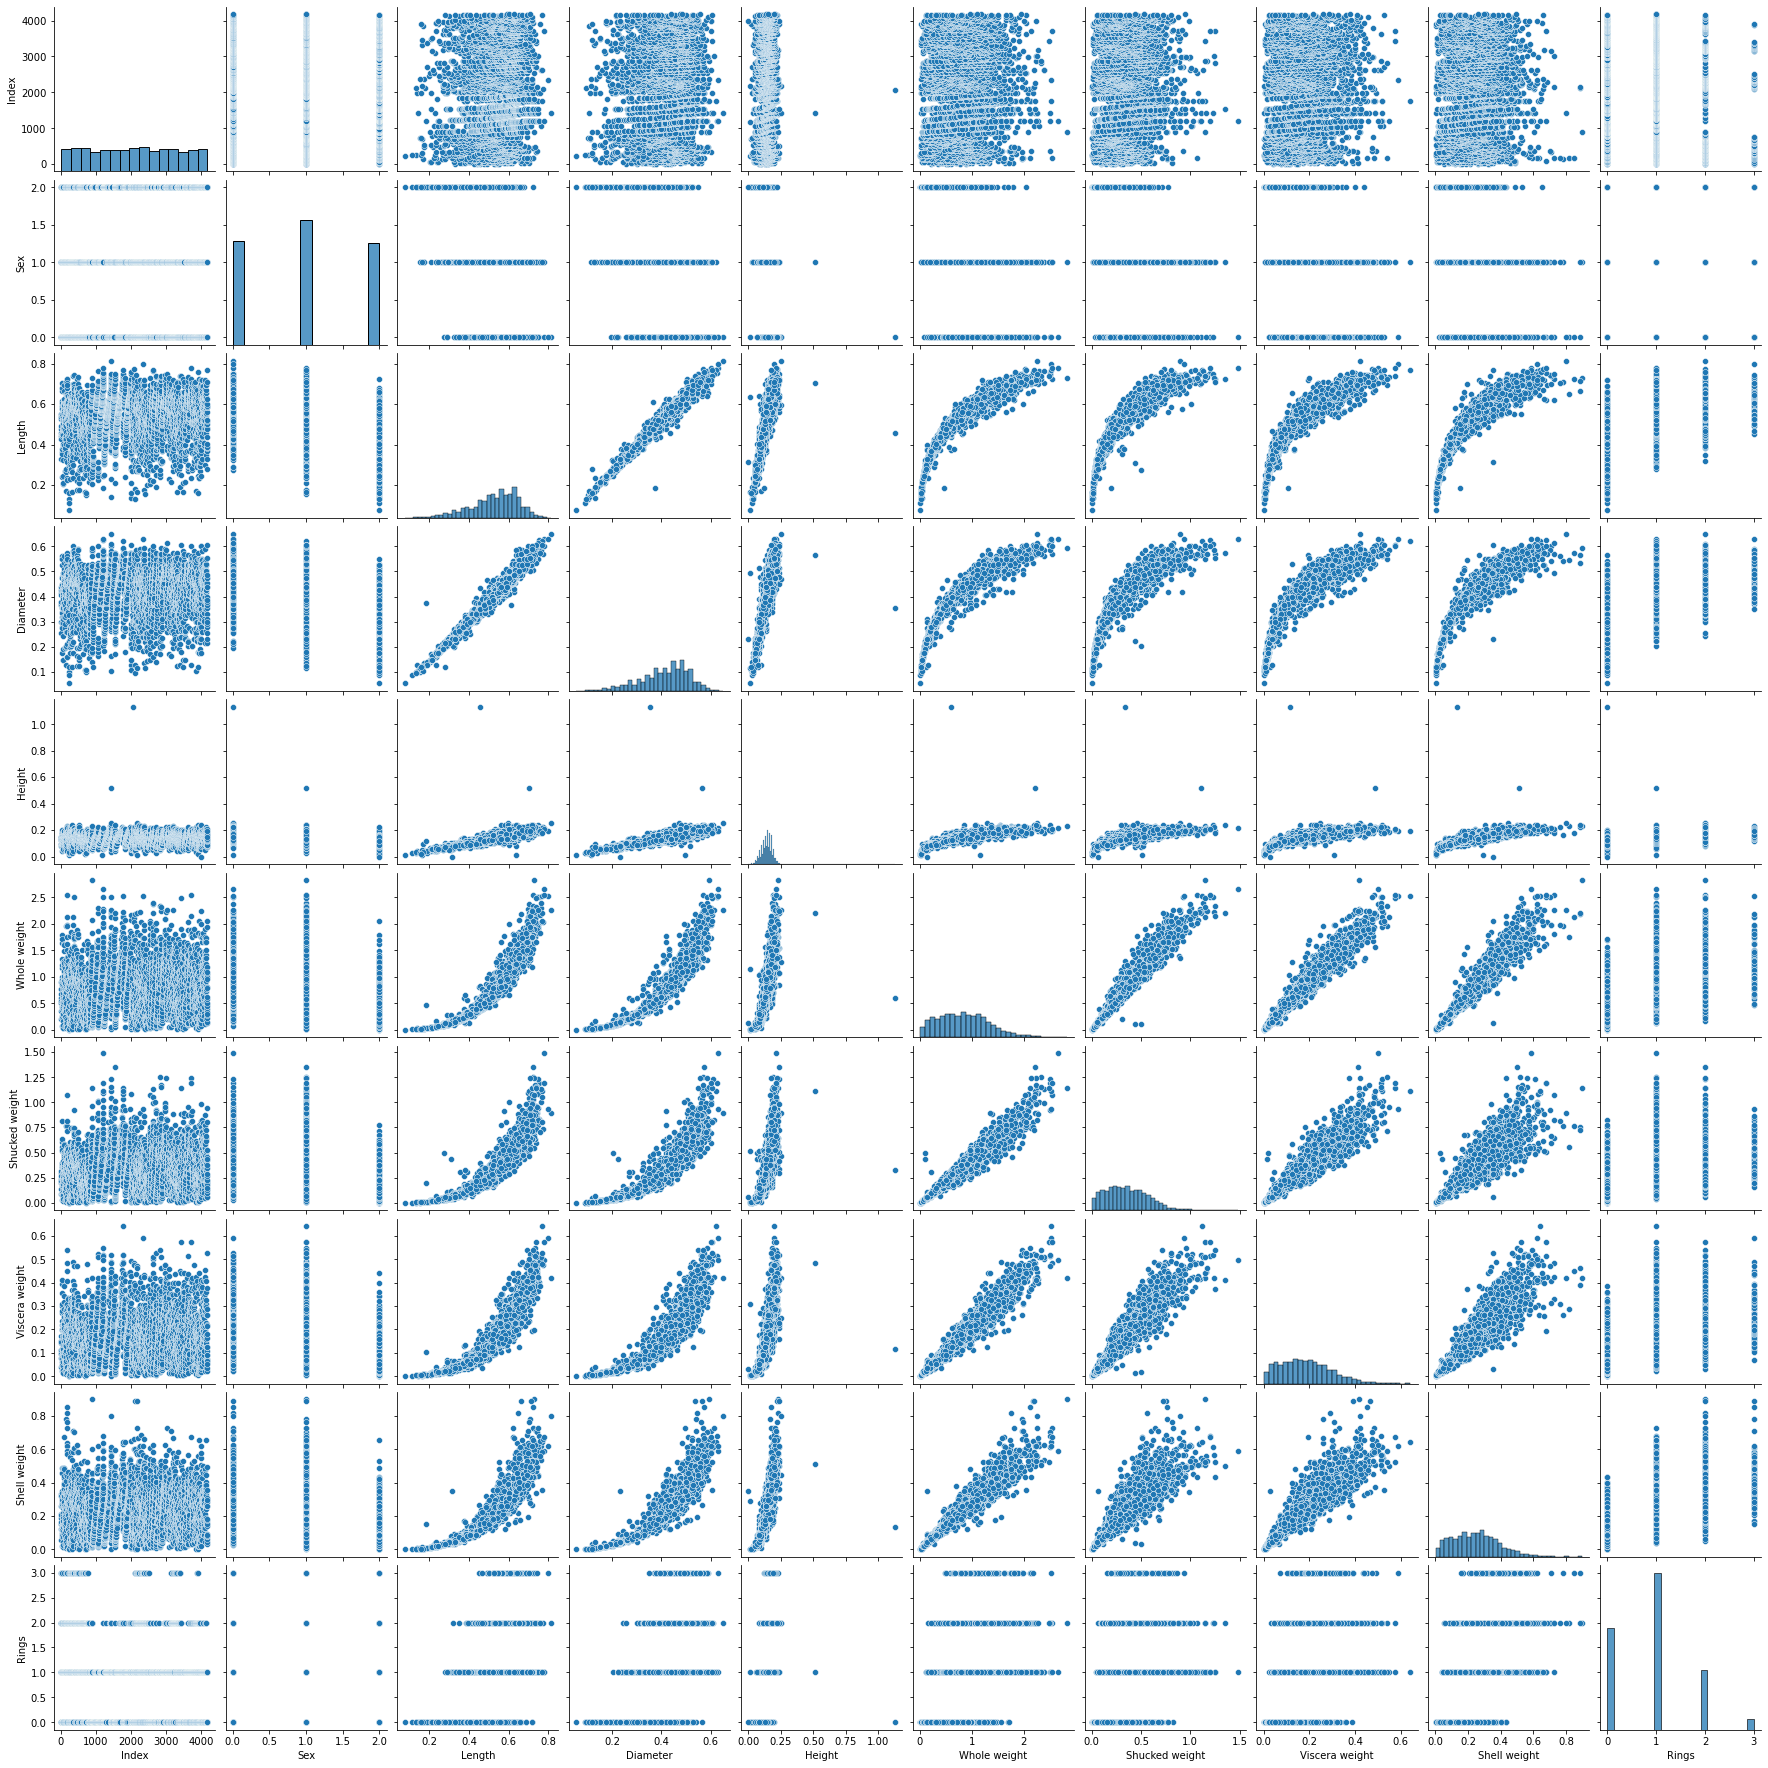

In [47]:
sns.pairplot(df);

We noticed from the pairplot that the attribute 'Height' might have a few outliers, so we check it with a boxplot below

c:\Users\merli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


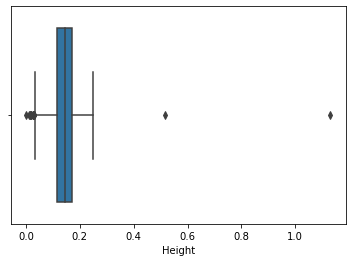

In [22]:
sns.boxplot(df['Height']);

2. Comment the exploration of step 1 pointing out if there are imbalanced
distributions, outliers, missing values

The distributions are not really skewed for any attribute.
We note how the "Height" attribute has a few outliers, which makes the distribution look very concentrated in low values.
We removed the missing values

3. Drop the columns that are not relevant for the classification operation,
if any, and explain why you do that.
Deal with missing values, if any

In [17]:
df.corr()

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Index,1.000000,0.024705,0.086550,0.072568,0.033286,0.065749,0.092096,0.072800,0.035691,-0.092600
Sex,0.024705,1.000000,-0.505504,-0.519474,-0.461054,-0.495379,-0.450683,-0.496160,-0.492966,-0.418631
Length,0.086550,-0.505504,1.000000,0.986224,0.798736,0.926238,0.896546,0.904082,0.896431,0.516438
Diameter,0.072568,-0.519474,0.986224,1.000000,0.803630,0.925252,0.890495,0.899024,0.903188,0.535738
Height,0.033286,-0.461054,0.798736,0.803630,1.000000,0.792330,0.746691,0.770087,0.790344,0.506183
Whole weight,0.065749,-0.495379,0.926238,0.925252,0.792330,1.000000,0.966902,0.965178,0.954802,0.514526
Shucked weight,0.092096,-0.450683,0.896546,0.890495,0.746691,0.966902,1.000000,0.928520,0.876951,0.396467
Viscera weight,0.072800,-0.496160,0.904082,0.899024,0.770087,0.965178,0.928520,1.000000,0.903981,0.488979
Shell weight,0.035691,-0.492966,0.896431,0.903188,0.790344,0.954802,0.876951,0.903981,1.000000,0.592919
Rings,-0.092600,-0.418631,0.516438,0.535738,0.506183,0.514526,0.396467,0.488979,0.592919,1.000000


There aren't really any irrelevant columns, since all of them have correlation not below 0.39 in absolute values with 'Rings', except for 'Index' which is obviously not relevant for the classification, so we will drop it. We already dealt with missing values

In [48]:
df = df.drop('Index', axis=1)

4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In [49]:
target = 'Rings'
X = df.drop(target, axis=1)
y = df[target]

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [51]:
model_lbls = ['knn', 'dt']

param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
param_dt = [{'max_depth': list(range(1,20))}]

models = {
    'dt': {
        'name': 'Decision Tree       ',
        'estimator': DecisionTreeClassifier(), 
        'param': param_dt,
          },
    'knn': {
        'name': 'K Nearest Neighbor ',
        'estimator': KNeighborsClassifier(),
        'param': param_knn
    }
}

score = 'f1_macro'

In [53]:
def print_best_params(model):
    print("Best parameters set found on train set:")
    print(model.best_params_)
    print()

In [54]:
final_report = {score: []}
confusion_matrices = {}
for model_type in model_lbls:
    model_type_dict = models[model_type]
    print("--------------------------------------------")
    print(f"Trying model {model_type_dict['name']}")
    classifier = GridSearchCV(estimator=model_type_dict['estimator'], param_grid=model_type_dict['param'], scoring=score, error_score='raise')
    classifier.fit(Xtrain, ytrain)
    print_best_params(classifier)
    ypred = classifier.best_estimator_.predict(Xtest)
    final_report[score].append(f1_score(ytest, ypred, average='macro'))
    cm = confusion_matrix(ytest, ypred)
    confusion_matrices[model_type_dict['name']] = cm

--------------------------------------------
Trying model K Nearest Neighbor 
Best parameters set found on train set:
{'n_neighbors': 1}

--------------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:
{'max_depth': 9}



5. Show the performance measures and the confusion matrices for the best
hyperparameters of each model

In [55]:
results_df = pd.DataFrame(data=final_report, index=model_lbls)
results_df

,f1_macro
knn,0.466971
dt,0.481773


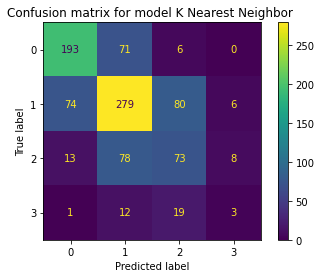

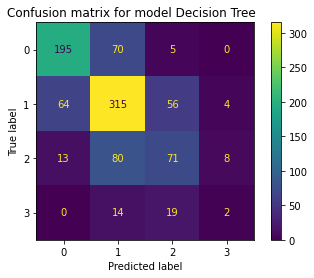

In [56]:
for model, cm in confusion_matrices.items():
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    disp.ax_.set_title(f"Confusion matrix for model {model}")

6. Comment the results

The decision tree classifier has a better performance considering the F1_macro as the performance measure

The majority of the labels for the target column in the dataset are 0 and 1, on which the two classifiers perform fairly well at predicting. Label 3 has a really low number of elements, but is classified correctly more than 50% of the time. On the other hand, both classifiers have a hard time at predicting correctly instances with the label 2, which are more often predicted as 1s erroneously.